# Mauna Loa Monthly In-Situ CO2 / Keeling

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## Downloads

In [2]:
# download Scripps

!wget --directory-prefix data --no-clobber \
    'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'

Die Datei »data/weekly_in_situ_co2_mlo.csv« ist schon vorhanden; kein erneuter Download.



In [3]:
def finalize_plot(plt, title, credits, filename):
    plt.title(title, size = 24)

    plt.annotate(
        credits,
        xy=(0.99, 0.02), xycoords="axes fraction",
        fontsize=8, color='black',
        ha="right", va="bottom",
        bbox=dict(boxstyle="square", facecolor='white', edgecolor='none',),
    )

    plt.grid()

    plt.savefig(f'images/{filename}.png')
    plt.savefig(f'images/svg/{filename}.svg')

    plt.show()

In [4]:
mlo = pd.read_csv('data/weekly_in_situ_co2_mlo.csv',
    header=60,
    usecols=[0,1],
    names=['Date', 'CO2']
)

In [5]:
df = mlo

df = df['1960-01-01' <= df['Date']]

df = df.set_index('Date')

df.index = pd.to_datetime(df.index)

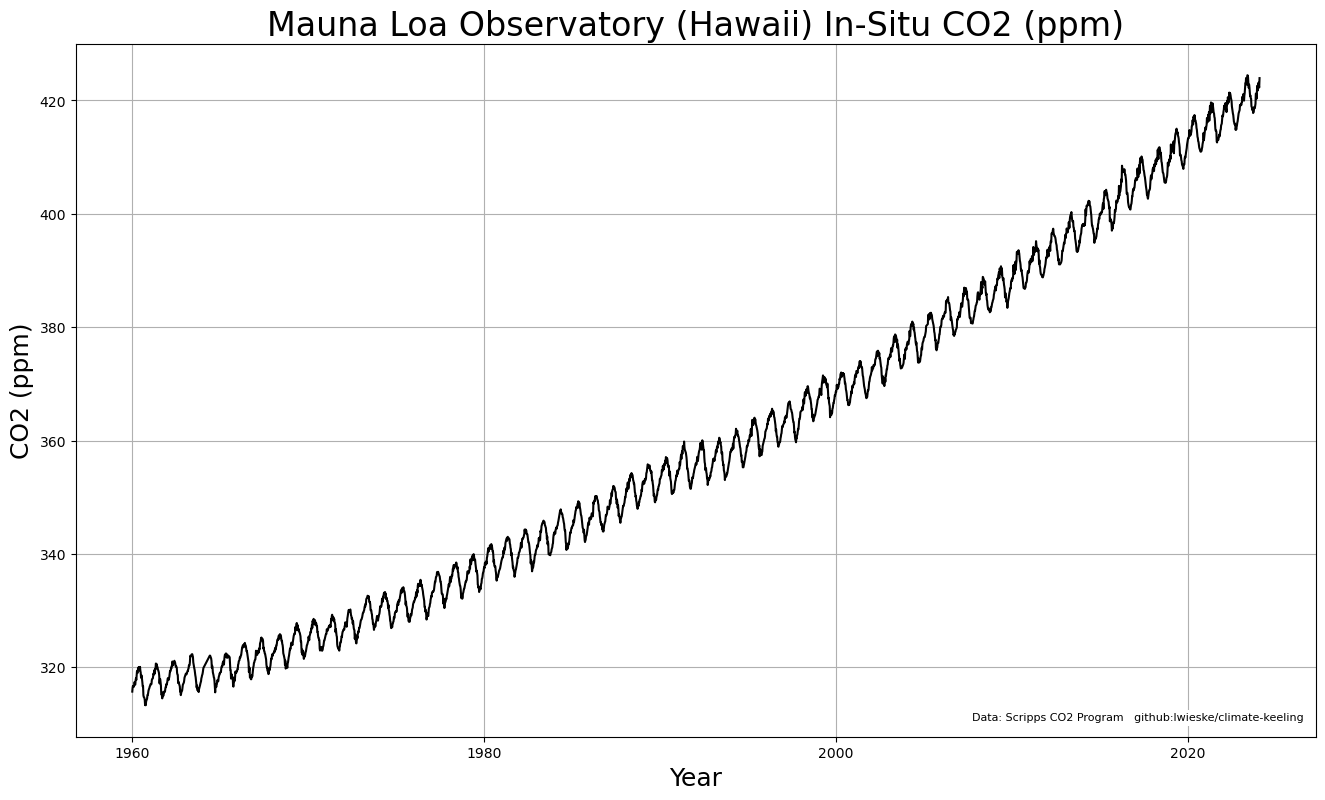

In [6]:
plt.rcParams["figure.figsize"] = (16,9)

ax = plt.gca()

ax.plot(df, color='black')

plt.xlabel('Year', size = 18)
plt.ylabel('CO2 (ppm)', size = 18)

plt.xticks(
    ticks=['1960-01-01', '1980-01-01', '2000-01-01', '2020-01-01'],
    labels=['1960', '1980', '2000', '2020'],
)

plt.title('Mauna Loa Observatory (Hawaii) In-Situ CO2 (ppm)', size = 24)

finalize_plot(plt,
    'Mauna Loa Observatory (Hawaii) In-Situ CO2 (ppm)',
    'Data: Scripps CO2 Program   github:lwieske/climate-keeling',
    'mauna_loa_weekly_insite_co2',
)